In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# for adding csv file as another options
# path=r'https:link'
# df=pd.read_csv(path)
df=pd.read_csv('student_info.csv')
df.describe()
df.info()
df.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


study_hours  student_marks
8.99         85.46            1
5.76         72.46            1
6.38         77.01            1
6.37         75.04            1
6.36         76.04            1
                             ..
7.81         82.55            1
7.80         81.60            1
7.79         79.17            1
7.75         79.50            1
5.01         70.11            1
Length: 195, dtype: int64

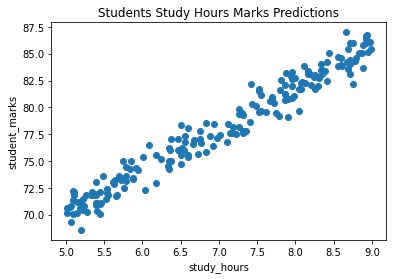

In [3]:
plt.scatter(x=df.study_hours,y=df.student_marks)
plt.xlabel('study_hours')
plt.ylabel('student_marks')
plt.title('Students Study Hours Marks Predictions')
plt.show()

Data cleaning

To anaylse whether the given data set has empty row values or not

In [4]:
df.isnull() #insull is used for showing empty values in rows

,study_hours,student_marks
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False
...,...,...
195,False,False
196,False,False
197,False,False
198,False,False


In [5]:
df.isnull().sum() #isnull.sum() it gives total no of empty values

study_hours      5
student_marks    0
dtype: int64

In [6]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [7]:
df.fillna(df.mean())

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19
...,...,...
195,7.530000,81.67
196,8.560000,84.68
197,8.940000,86.75
198,6.600000,78.05


In [8]:
df2=df.fillna(df.mean())
df2

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19
...,...,...
195,7.530000,81.67
196,8.560000,84.68
197,8.940000,86.75
198,6.600000,78.05


In [9]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [10]:
X=df2.drop('student_marks',axis=1)
y=df2.drop('study_hours',axis=1)
print('shape of X:' ,X.shape)
print('shape of y:' ,y.shape)

shape of X: (200, 1)
shape of y: (200, 1)


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=51)
print('shape of X_train:' ,X_train.shape)
print('shape of y_train:' ,y_train.shape)
print('shape of X_test:' ,X_test.shape)
print('shape of y_test:' ,y_test.shape)

shape of X_train: (160, 1)
shape of y_train: (160, 1)
shape of X_test: (40, 1)
shape of y_test: (40, 1)


In [12]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [13]:
lr.coef_

array([[3.93571802]])

In [14]:
lr.intercept_

array([50.44735504])

In [16]:
m=3.93571802
c=50.44735504
y=m*4+c
y

66.19022712

In [19]:
lr.predict([[4]])[0][0].round(2)

66.19

In [20]:
y_pred=lr.predict(X_test)
y_pred

array([[83.11381458],
       [78.9025963 ],
       [84.57003024],
       [85.82946001],
       [84.72745896],
       [80.75238377],
       [72.84159055],
       [71.66087515],
       [73.23516235],
       [71.66087515],
       [73.47130543],
       [76.38373677],
       [73.23516235],
       [73.58937697],
       [82.95638585],
       [70.40144538],
       [73.23516235],
       [78.74516758],
       [75.55723598],
       [82.68088559],
       [76.65923703],
       [70.48015974],
       [74.77009238],
       [77.98143645],
       [85.59331693],
       [82.56281405],
       [76.42309395],
       [85.0423164 ],
       [78.39095296],
       [81.38209865],
       [81.73631327],
       [83.15317176],
       [82.20859943],
       [81.10659839],
       [73.58937697],
       [71.1492318 ],
       [71.89701823],
       [81.53952737],
       [72.60544747],
       [71.93637541]])

In [22]:
pd.DataFrame(np.c_[X_test,y_test,y_pred],columns=['study_hours','student_marks_original','student_marks'])

,study_hours,student_marks_original,student_marks
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


fine tune model

In [23]:
lr.score(X_train,y_train)

0.9589875741425086

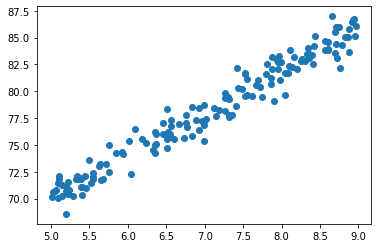

In [24]:
plt.scatter(X_train,y_train)

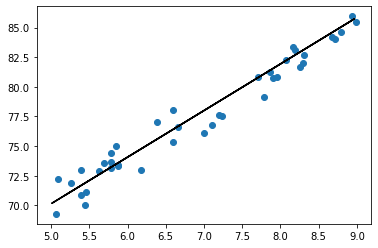

In [27]:
plt.scatter(X_test,y_test)
plt.plot(X_train,lr.predict(X_train),color='black')

In [29]:
import joblib
joblib.dump(lr,'student_mark_prediction.pkl')

['student_mark_prediction.pk1']

In [30]:
model=joblib.load('student_mark_prediction.pk1')
model.predict([[4]])

array([[66.1902271]])